# Simulating trajectories with multiple attractors: A chaotic system?

## Background

What is chaos?  Let's consult Wikipedia:

> Chaos (Ancient Greek: χάος, romanized: Kháos) is the cosmological void state preceding the creation of the universe (the cosmos) in early Greek cosmology. It can also refer to an early state of the cosmos constituted of nothing but undifferentiated and indistinguishable matter.

Oops, wrong chaos.  We want [this one](https://en.wikipedia.org/wiki/Chaos_theory):

> Chaos theory... is an interdisciplinary area of scientific study and branch of mathematics. It focuses on underlying patterns and deterministic laws of dynamical systems that are **highly sensitive to initial conditions**.

A chaotic system is a system that is completely described by (usually simple) deterministic laws (N2L in our case), but whose behavior is incedibly complicated to predict.  The last little bit, "highly sensitive to initial conditions," means that small differences in the initial configuration of the system can lead to wildly different final states.  

An example of a non-chaotic system is something like the kicking of a soccer ball.  If we change the initial position and velocity of the soccer ball by small amounts (say $0.01\%$), the final state of the soccer ball doesn't change that much ($\approx 0.01\%$).

The standard example of a chaotic system is the double pendulum.  Please watch [this slick video](https://www.youtube.com/watch?v=K5dOm_WWaNY)!  And [this nifty little short](https://www.youtube.com/shorts/WFaCoO-2Dro) done in Python!

Applied to the double pendulum, "chaos" means that the general behavior of the pendulum (how many times it loops, which bar has more kinetic energy, which way it's swinging at $t = 5$~s) is highly senstive to it initial state.  Two identical pendula whose initial positions differ by $0.0001^\circ$ can have wildly different long-term behavior!

Chaotic systems are very difficult to study with analytical techniques because it's inherently impossible to get an idea of the system's general behavior from looking at the equations of motion.  Luckily, we now know enough Python and numerical tools to simulate such systems!  With simulations, we can produce **many** trails with slightly differing initial conditions and investigate the long-term behavior.  Yay!

***

### Your mission: The 4-attractor basin (4AB)

In this project you will investigate a system that possibly exhibits *chaotic* behavior.  

**The system:** Picture a 2-d plane ($xy$) on which are located four *attractors*.  "Attractor" is a general physics term for a body that draws other bodies toward it.  Due to gravitation, a star is an attractor for the planets and other objectts that orbit it.  The electromagnetic interaction makes a positively charged atomic nucleus an attractor for the electrons that orbit it.  We also use "attractor" to refer to things like the stable equilibrium point of a pendulum (*i.e.*, the bottom of its swing).

We will study the motion of a single particle released from rest somewhere in the $xy$ plane.  The four attractors in your system attract a single particle according to a $1/r^2$ law (like gravitation).  Let's let the position of the particle be given by $\vec{r} = (x,y,z)$ and the position of each attractor be $\vec{a} = (a_x, a_y, a_z)$.  The magnitude of the force due to a sinle attractor is then given by:
$$ |\vec{F}_a| = \frac{1}{\left( (a_x - x)^2 + (a_y - y)^2 + d^2\right)}$$
The $d^2$ in the denominator is there to prevent this force from BLOWING UP if the particle gets too close to the attractor.
Without going through too much math, the $x$ and $y$ components of this force are
\begin{equation}
    F_{ax} = |\vec{F}_a|\frac{a_x - x}{\sqrt{(x-a_x)^2 + (y-a_y)^2}}, \;\;\;\;\;
    F_{ay} = |\vec{F}_a|\frac{a_y - y}{\sqrt{(x-a_x)^2 + (y-a_y)^2}}
\end{equation}

The particle will also experience a drag force of the form 
$$\vec{F}_d = -(0.05)\vec{v},$$
where $\vec{v}$ is the velocity of the particle.
Note that the components of this force are then given by
\begin{equation}
    F_{dx} = |\vec{F}_d|\frac{v_x}{\sqrt{(v_x)^2 + (v_y)^2}}, \;\;\;\;\;
    F_{dy} = |\vec{F}_d|\frac{v_y}{\sqrt{(v_x)^2 + (v_y)^2}}
\end{equation}

The net force on the particle will then be the sum of all four attractor forces and the drag force:
$$ \vec{F}_{net} = \displaystyle\sum_{i=1}^{4}\vec{F}_{ai} + \vec{F}_d = \vec{F}_{a1} + \vec{F}_{a2} + \vec{F}_{a3} + \vec{F}_{a4} + \vec{F}_d$$

Yikes!  This is looking complicated.  Don't worry though -- we're not going to do this analytically.  To simulate, all you have to do to is code up the forces, and then use the Euler algorithm (from module 7!) to update the velocity and position of the particle according to N2L.

Heck, I'm even going to give you some skeleton code to help you out &#x1F600;  (Yes, I did Google how to do emoji in a Jupyter notebook.)

***

### N2L and the Euler Algorithm

Let's do a quick recap of simulating dynamics with the Euler algorithm (what we covered in module 7).

Recall N2L:
\begin{equation}
\displaystyle \sum \vec{F} = m\frac{d^2\vec{r}}{dt^2}
\end{equation}

In the previous section of this notebook, I gave you some recipes for calculating the left-hand side of N2L for the 4AB.
All that's left to do to create a simulation is to use the net force to calculate the particle's $\vec{a}$, use $\vec{a}$ to update $\vec{v}$, and use $\vec{v}$ to update the $\vec{r}$.

In module 7 we talked all about the generalized Euler algorithm for a general second-order ODE, *i.e.* an equation that relates a function to its first and second derivatives.  You didn't like how we did this in terms of new functions $u_1(t)$ and $u_2(t)$. 
Now we can do it a little more straight-forwardly in terms of kinematic quantities: $\vec{a}$, $\vec{v}$, $\vec{r}$.
\begin{align}
    \vec{r}(t)\\
    \vec{v}(t) &= \frac{d\vec{r}}{dt}\\
    \vec{a}(t) &= \frac{d\vec{v}}{dt}
\end{align}
Hopefully these quantities make more intuitive sense to you than $u_1$ and $u_2$.

To do a simulation, we turn these derivatives into difference equations.  Changing $dt$ to $\Delta t$ and doing some simple algebra yields:
\begin{eqnarray}
  \Delta \vec{r} = \vec{v} \Delta t\\
  \Delta \vec{v} = \vec{a} \Delta t
\end{eqnarray}

We can calculate the net force for our particle.  N2L allows us to calculate the acceleration.  The equations above allow us to update the velocity and position for the next time step.

To be clear, the Euler Algorithm for a second-order N2L ODE will be to do the following at each step in the simulation:
1. calculate $\vec{F}_{net}$
2. calculate $\vec{a}$
3. calculate $\Delta \vec{v}$
4. update $\vec{v}$ with $\vec{v}' = \vec{v} + \Delta \vec{v}$
5. calculate $\Delta \vec{r}$
6. update $\vec{r}$ with $\vec{r}' = \vec{r} + \Delta \vec{r}$
7. update $t$ with $t = t + \Delta t$
8. REPEAT

That's almost all there is to it!  All you have to do is all of this stuff TWICE -- once for the x component and once for the y component.

***  

### Part 1

The first thing that you must do is get a simulation running.  I'll provide a lot of code below, but you'll need to do some edits to implement the forces and updating I discussed above.

First, let's do some imports and define a couple useful functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def att_force_mag(x, y, ax, ay):
    # x,y are particle positions; ax, ay are attractor positions
    f_scale = 1.0
    sep = np.sqrt((ax - x)**2 + (ay - y)**2 + 0.5**2)
    return f_scale / sep**2

def drag_force_mag(vx, vy):
    return 0.05 * np.sqrt(vx**2 + vy**2)

Now let's set up some of the parameters of the simulation: how big the plane is and where the attractors are located.

In [6]:
x_max, y_max = 1.0, 1.0

attractor_xs = [x_max/2.0, x_max/2.0, -x_max/2.0, -x_max/2.0]
attractor_ys = [y_max/2.0, -y_max/2.0, y_max/2.0, -y_max/2.0]
n_attractors = len(attractor_xs)

And now let's do the simulation!  I've set up the code block below to show the trajectory of the particle in the $xy$ plane.  BUT I didn't put in the stuff about the force and the $\vec{a}$, $\vec{v}$, $\vec{r}$ updating -- you get to do that.  I put notes in where you need to add code.

Go through each line of the cell below and make sure you know what it does.  Then add the necessary code where indicated.

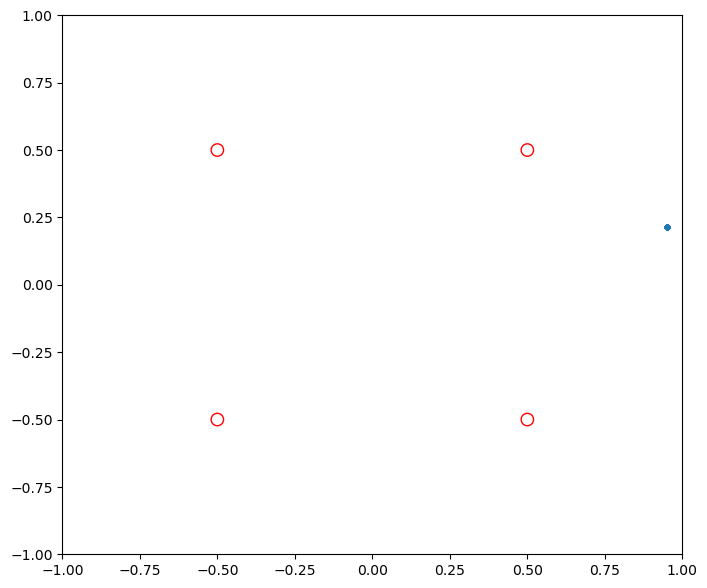

In [15]:
t = 0
dt = 0.05

x = 0.95 * x_max
y = np.random.random() * y_max
vx, vy = 0, 0
ax, ay = 0, 0

x_list = []
y_list = []
xv_list = []
vy_list = []

while t < 500:
    fx, fy = 0, 0
    for i in range(n_attractors):
        attractor_force_mag = 0  # use the functions above to calculate the magnitude of the force from the ith attractor
        fx = fx + 0              # change the 0 to the x component of the ith attractor force
        fy = fy + 0              # change the 0 to the y component of the ith attractor force

    drag_force_mag = 0           # change the 0 to the magnitude of the drag force
    fx = fx + 0                  # change the 0 to the x component of the drag force 
    fy = fy + 0                  # change the 0 to the y component of the drag force

    ax = 0                       # change 0 to calculate x component of acceleration (hint: use N2L)
    ay = 0                       # change 0 to calculate y component of acceleration (hint: use N2L)

    vx = vx + 0                  # change 0 to delta vx
    vy = vy + 0                  # change 0 to delta vy

    x = x + 0                    # change 0 to delta x
    y = y + 0                    # change 0 to delta y

    x_list.append(x)
    y_list.append(y)
    
    t = t + dt

fig = plt.figure(figsize=(8,7))
plt.plot(x_list, y_list, '.-', alpha=0.75, zorder=1)
plt.xlim(-x_max, x_max)
plt.ylim(-y_max, y_max)
plt.scatter(attractor_xs, attractor_ys, s=80, facecolors='none', edgecolors='r', zorder=2)
plt.show()

If you got the code above working, you should see a pretty wild trajectory!  Note that the initial position of the particle is randomly generated.  Rerun the simulation a few times.

Is it easy to tell from the initial position where the particle will wind up?  Save your coolest trajectory and share it with the class!

### Part 2

Now it's time to run MANY simulations.  Copy the code from above.  Modify it so that it runs the simulation for 1000 different starting positions, evenly spaced in $x$ between $0$ and $1$, and with the same initial $y$ value ($0.95$).

The code shouldn't store the entire trajectory and should not make any graphs!  Rather, it should generate lists of the initial positions and the final positions.  Name these lists `initial_x`, `initial_y`, `final_x`, and `final_y`.

### Part 3

Now write a bit of code that looks at the `final_x` and `final_y` lists and determines which *quadrant* of the plane the particle ends in (*i.e.*, 1 through 4).  Store these quadrant values in a list called `final_quadrants`.

### Part 4

Now the fun part!  Make a graph of the initial $y$ position *vs.* the initial $x$ position in which the points are colored accorind to the final quadrant!  WOW!  Note: this should be fairly easy to do with `pyplot`'s `scatter` object.

What do you notice about the relationship between initial position and the final quadrant?  Does it look like the final state of the system is **highly sensitive to** the initial conditions?  Explain!

## The Big Finale

Now repeat all of your steps to run 10000 simulations with different starting points randomly distributed in quadrant 1.  You will remake the graph from Part 4.  Comment on the questions from Part 4 about relationship between initial and final positions.